In [90]:
# environment set up
import keras
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf # only use tensorflow keras
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# working folder
directory = "/Users/Srikar/Desktop/Velexi/spectra-ml/data"
os.chdir(directory)

# print(os.getcwd())

In [91]:
# dataset = str(directory + "/dataset3")
# num_samples = len([name for name in os.listdir(dataset) if \
#                    os.path.isfile(os.path.join(dataset,name))])

# print(num_samples)

In [92]:
stddata_path = directory+"/Srikar-Standardized"
metadata = pd.read_csv(stddata_path+"/spectra-metadata.csv", sep="|")
metadata.head()

,spectrum_id,value_type,material,spectrometer_purity_code,measurement_type,raw_data_path
0,23077,reflectance,Rangeland C03-022 S12% G22%,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Rangeland_C03-022...
1,22344,reflectance,Marsh SPAL92%...a CRMS322v78,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Marsh_SPAL92%...a...
2,22136,reflectance,Tumbleweed ANP92-2C Dry,BECKa,AREF,ChapterV_Vegetation/splib07a_Tumbleweed_ANP92-...
3,24017,reflectance,Rangeland L02-069 S00% G99%,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Rangeland_L02-069...
4,21060,reflectance,Douglas-Fir YNP-DF-1 forest,AVIRISb,RTGC,ChapterV_Vegetation/splib07a_Douglas-Fir_YNP-D...


In [93]:
metadata = metadata[metadata['value_type'] == "reflectance"]
metadata = metadata[~metadata['spectrometer_purity_code'].str.contains("NIC4")]
metadata.shape

(1810, 6)

In [94]:
# def find_record(string):
#     ind = string.find("|")
#     return string[:ind]

In [95]:
# data = metadata.iloc[0]
# type(data)

# metadata[metadata["material"].str.match("Chlor")].shape[0]

In [96]:
record_nums = []
y = []
spectrum_names = []

act = 0
aln = 0
chl = 0

for i in range(metadata.shape[0]):
    data = metadata.iloc[i, :]
    if data[2].find("Actinolite") != -1: # if material name contains actinolite
        record_nums.append(data[0])
        y.append(int(0))
        spectrum_names.append("Actinolite")
        act += 1
    elif data[2].find("Alun") != -1:
        record_nums.append(data[0])
        y.append(int(1))
        spectrum_names.append("Alunite")
        aln += 1
    elif (data[2].find("Chlorit") != -1 or data[2].find("Chlor.") != -1 or data[2].find("Chlor+") != -1 or data[2].find("Chl.") != -1):
        record_nums.append(data[0])
        y.append(int(2))
        spectrum_names.append("Chlorite")
        chl += 1

y = np.reshape(y, (len(y), 1))
num_samples = len(record_nums)
print(num_samples)
print(len(y))
print(type(y))
print(act)
print(aln)
print(chl)

76
76
<class 'numpy.ndarray'>
19
32
25


In [97]:
spectrum_len = 500
spectra = np.zeros((num_samples,spectrum_len))
wavelengths = np.zeros((1,spectrum_len))

# y = np.zeros((num_samples, 1))

In [98]:
# import shutil

# for num in actinolite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Actinolite")
# for num in alunite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Alunite")
# for num in chlorite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Chlorite")

In [99]:
num_neg = 0
for i in range(num_samples):
    hasnegative = False
    data = pd.read_csv(stddata_path+"/{}.csv".format(record_nums[i]))
    if i == 0:
        wavelengths[i,:] = data.iloc[:, 0].to_numpy()
    spectra[i,:] = data.iloc[:, 1].to_numpy()
    for j in range(spectrum_len):
        if spectra[i,j] < 0:
            hasnegative = True
            spectra[i,j] = 0
    if hasnegative:
        print(record_nums[i])
        num_neg += 1
print(num_neg)
# wavelengths
# print(record_nums[43])
# print(spectra[43])

0


In [100]:
# spectrum_len = 480
# spectra = np.zeros((num_samples,spectrum_len))

# spectrum_categories = np.zeros(num_samples)
# first_record_of_mixtures_chapter = 11602
# is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
# is_a_mixture = 2
# spectrum_names = ["" for x in range(num_samples)]

# y = np.zeros((num_samples, 1))

# os.chdir(dataset)

# i = 0

# for filename in os.listdir(dataset):
#     file_object  = open(filename, 'r').readlines()
# #     strip off header, add to matrix 'spectra'
#     spectra[i,:] = file_object[1:]

# #     label spectrum class, based on header
# #     actinolite: 0, alunite: 1, chlorite: 2
#     material_name = file_object[0]
    
#     spectrum_names[i] = material_name
    
#     start = 'Record='
#     end = ':'
#     record_number = int((material_name.split(start))[1].split(end)[0])
#     # print(record_number)
#     if record_number < first_record_of_mixtures_chapter:
#         spectrum_categories[i] = is_a_mineral
#     else:
#         spectrum_categories[i] = is_a_mixture

# #     print(material_name)

#     if material_name.find('Actinolite',) != -1: # if material name contains actinolite
#         y[i,0] = 0
#     elif material_name.find('Alun',)!= -1:
#         y[i,0] = 1
#     else: # chlorite
#         y[i,0] = 2

# #     turn missing points into 0
#     for j in range(spectrum_len):
#         if spectra[i,j] < 0:
#             spectra[i,j] = 0
#     i+=1

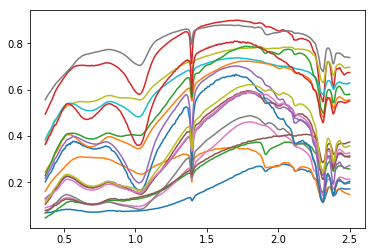

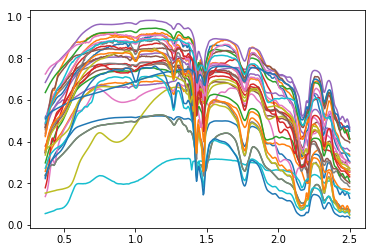

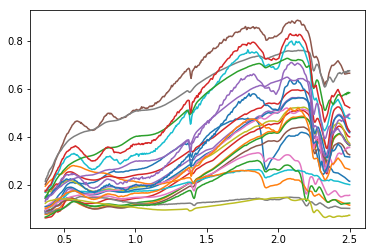

In [101]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

mineral_names = ["Actinolite", "Alunite", "Chlorite"]

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
#     if spectrum_categories[i] == is_a_mineral:
#         linewidth = mineral_linewidth
        
#         #testcode
#         #print('min')
#     else: 
#         linewidth = mixture_linewidth
    linewidth = 2
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
#     fig = plt.figure()
#     plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i]) # remove linewidth for all mixtures/minerals to be standard
    plt.plot(wavelengths[0,:], spectra0[i,:]) # remove linewidth for all mixtures/minerals to be standard
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
#     path = "/Users/Srikar/Desktop/Velexi/spectra-ml/lab-notebook/smunukutla/plots/" + mineral_names[0] + str(i) + ".png"
#     fig.savefig(path, format = "PNG")
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i1):
#     plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
    plt.plot(wavelengths[0,:], spectra1[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
#     plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
    plt.plot(wavelengths[0,:], spectra2[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [102]:
sample_indices = list(range(0, num_samples))
print(num_samples)
random.shuffle(sample_indices)
train_set_size = 3*(num_samples//5)
dev_set_size = (num_samples//5)
test_set_size= num_samples-dev_set_size - train_set_size
print(train_set_size)
print(test_set_size)
print(dev_set_size)
train_set_indices = sample_indices[:train_set_size]
dev_set_indices = sample_indices[train_set_size: train_set_size+dev_set_size]
test_set_indices= sample_indices[train_set_size+dev_set_size: num_samples]
print(train_set_indices)
print(test_set_indices)
print(dev_set_indices)

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
dev_set = spectra[dev_set_indices, :]
dev_labels = y[dev_set_indices, :]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]

76
45
16
15
[5, 8, 67, 63, 41, 29, 43, 54, 7, 60, 4, 64, 52, 19, 56, 70, 61, 47, 39, 59, 33, 13, 46, 14, 11, 18, 23, 1, 66, 32, 58, 31, 38, 20, 48, 55, 68, 57, 72, 65, 12, 40, 74, 75, 17]
[62, 50, 37, 51, 42, 44, 69, 27, 45, 15, 6, 9, 73, 0, 3, 26]
[2, 53, 35, 34, 16, 71, 22, 21, 28, 30, 49, 36, 25, 24, 10]


In [103]:
train_labels = train_labels.flatten()
dev_labels = dev_labels.flatten()
test_labels = test_labels.flatten()
# type(train_labels)

In [104]:
# len(train_set)
# len(train_set[17])
print(test_set.shape)

(16, 500)


In [105]:
train_set = np.reshape(train_set, (train_set.shape[0], spectrum_len, 1))
dev_set = np.reshape(dev_set, (dev_set.shape[0], spectrum_len, 1))
test_set = np.reshape(test_set, (test_set.shape[0], spectrum_len, 1))

train_labels = np.reshape(train_labels, (train_labels.shape[0], 1))
dev_labels = np.reshape(dev_labels, (dev_labels.shape[0], 1))
test_labels = np.reshape(test_labels, (test_labels.shape[0], 1))

train_labels = to_categorical(train_labels)
dev_labels = to_categorical(dev_labels)
test_labels = to_categorical(test_labels)

In [106]:
print(train_labels)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [107]:
model = Sequential()
# model.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model.add(Conv1D(64, 25, activation='relu', input_shape=(train_set.shape[1], 1)))
model.add(Conv1D(64, 25, activation='relu'))
model.add(MaxPooling1D(4)) # 108 by 64 so far
model.add(Conv1D(100, 25, activation='relu'))
model.add(Conv1D(100, 25, activation='relu'))
model.add(MaxPooling1D(4))
# model.add(Dropout(0.5))
# model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 476, 64)           1664      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 452, 64)           102464    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 113, 64)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 89, 100)           160100    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 65, 100)           250100    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 16, 100)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
__________

In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 12
EPOCHS = 50

print(train_labels.shape)
model.fit(train_set, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(dev_set, dev_labels)) 

(45, 3)
Train on 45 samples, validate on 15 samples
Epoch 1/50
45/45 [==============================] - 1s 26ms/step - loss: 1.0402 - acc: 0.3556 - val_loss: 0.8928 - val_acc: 0.4667
Epoch 2/50
45/45 [==============================] - 1s 12ms/step - loss: 0.7933 - acc: 0.5556 - val_loss: 0.5566 - val_acc: 0.8000
Epoch 3/50
45/45 [==============================] - 1s 13ms/step - loss: 0.6971 - acc: 0.6222 - val_loss: 0.5637 - val_acc: 0.5333
Epoch 4/50
45/45 [==============================] - 1s 12ms/step - loss: 0.5444 - acc: 0.6444 - val_loss: 0.4927 - val_acc: 0.8000
Epoch 5/50
45/45 [==============================] - 1s 12ms/step - loss: 0.4687 - acc: 0.7111 - val_loss: 0.6787 - val_acc: 0.8000
Epoch 6/50
45/45 [==============================] - 1s 11ms/step - loss: 0.4702 - acc: 0.7333 - val_loss: 0.5110 - val_acc: 0.8000
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.4184 - acc: 0.7333 - val_loss: 0.5194 - val_acc: 0.8000
Epoch 8/50
45/45 [=============

In [109]:
y_pred = model.predict(test_set)
y_pred

array([[2.34958904e-07, 4.43117709e-17, 9.99999762e-01],
       [4.92574112e-30, 1.00000000e+00, 6.08627261e-34],
       [8.37454772e-10, 9.61075454e-29, 1.00000000e+00],
       [9.99878645e-01, 1.18312593e-04, 2.95775976e-06],
       [9.96505141e-01, 2.75101559e-25, 3.49493395e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99711573e-01, 3.15043813e-17, 2.88422161e-04],
       [7.88345722e-10, 1.89889081e-22, 1.00000000e+00],
       [7.84331462e-08, 3.31774324e-20, 9.99999881e-01],
       [5.78232708e-23, 1.00000000e+00, 1.61897955e-23],
       [1.70031679e-04, 2.52807519e-21, 9.99829888e-01],
       [9.99999166e-01, 4.44351780e-23, 8.44385909e-07],
       [1.68311715e-14, 1.00000000e+00, 1.24781442e-15],
       [2.74266439e-12, 7.73226077e-25, 1.00000000e+00],
       [4.78313550e-18, 1.00000000e+00, 1.24150124e-20]], dtype=float32)

In [110]:
test_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [111]:
model.evaluate(test_set, test_labels)

16/16 [==============================] - 0s 4ms/step


[1.0076360702514648, 0.9375]